In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [40]:
df = pd.read_csv('logbook_assignment1.csv')
df2 = pd.read_csv('logbook_assignment1.csv')
df3 = pd.read_csv('logbook_assignment1.csv')
# let's print out how many entries there are in the dataset
print(len(df))

C:\Users\Taboka Chloé Dube\AppData\Local\Temp\ipykernel_17448\1174220521.py:1: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('logbook_assignment1.csv')
C:\Users\Taboka Chloé Dube\AppData\Local\Temp\ipykernel_17448\1174220521.py:2: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('logbook_assignment1.csv')
C:\Users\Taboka Chloé Dube\AppData\Local\Temp\ipykernel_17448\1174220521.py:3: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('logbook_assignment1.csv')


1174870


In [41]:
print(df)

                                               date_fueled date_captured  \
0        Cooling System, Heating System, Lights, Spark ...    Apr 7 2022   
1                                               Nov 7 2012   Aug 30 2016   
2                                              Sep 22 2012   Sep 28 2012   
3                                               May 4 2019    May 4 2019   
4                                              Feb 15 2022   Feb 15 2022   
...                                                    ...           ...   
1174865                                        Feb 19 2020   Feb 19 2020   
1174866                                         Dec 6 2019    Dec 6 2019   
1174867                                         Oct 4 2021    Oct 4 2021   
1174868                                        Jul 26 2021   Jul 26 2021   
1174869                                        Mar 12 2019   Mar 12 2019   

         odometer gallons cost_per_gallon total_spent   mpg    miles  \
0         73,37

In [42]:
df.describe()
df.dtypes

date_fueled        object
date_captured      object
odometer           object
gallons            object
cost_per_gallon    object
total_spent        object
mpg                object
miles              object
user_url           object
dtype: object

In [43]:
#1.1
pattern = r'^[A-Z][a-z]{2} \d{1,2} \d{4}$'
date_fuel = df2['date_fueled'].str.match(pattern)
percentage = (date_fuel.sum() / len(df2)) * 100
proportion = 100-percentage
print(f"1. {proportion:.2f}% of rows don't match the correct date format.")

1. 11.68% of rows don't match the correct date format.


In [44]:
valid_fueled = df['date_fueled'].astype(str).str.match(pattern)
valid_capture = df['date_captured'].astype(str).str.match(pattern)

df.loc[~valid_fueled & valid_capture, 'date_fueled'] = df['date_captured']
print("2.")
df.head()

2.


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,Apr 7 2022,Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,Nov 7 2012,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
2,Sep 22 2012,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
3,May 4 2019,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
4,Feb 15 2022,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...


In [45]:

df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')
df.loc[~df['date_fueled'].dt.year.between(1900, 2099), 'date_fueled'] = pd.NaT
print("3.")
df.head()

3.


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,2022-04-07,Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,2012-11-07,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
2,2012-09-22,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
3,2019-05-04,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
4,2022-02-15,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...


In [46]:
min_date = pd.Timestamp("2005-01-01")
max_date = pd.Timestamp("2025-09-01")
mask = (df['date_fueled'] >= min_date) & (df['date_fueled'] <= max_date)
newdf = df.loc[mask]

print("4. Removed dates that are in the future relative to 1st September 2025 and before 2005")
newdf.head()

4. Removed dates that are in the future relative to 1st September 2025 and before 2005


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,2022-04-07,Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,2012-11-07,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
2,2012-09-22,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
3,2019-05-04,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
4,2022-02-15,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...


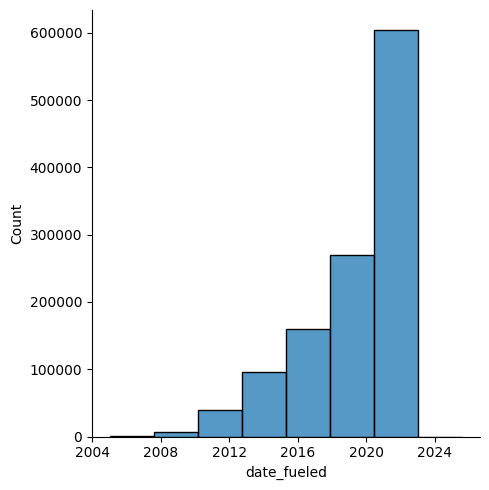

In [47]:
sns.displot(newdf, x="date_fueled", binwidth = 1000)
#make a comment on the distribution of the data.

In [48]:
#1.2
gallons_null_count = df['gallons'].isnull().sum()
gal_per = (gallons_null_count / len(df)) * 100
print(f"The percentage of missing gallons values is {gal_per:.2f}%")

miles_count = df['miles'].isnull().sum()
miles_per = (miles_count / len(df)) * 100
print(f"The percentage of missing miles values is {miles_per:.2f}%")

odometer_count = df['odometer'].isnull().sum()
odometer_per = (odometer_count/ len(df)) * 100
print(f"The percentage of missing odometer values is {odometer_per:.2f}%")



The percentage of missing gallons values is 6.32%
The percentage of missing miles values is 87.55%
The percentage of missing odometer values is 12.70%


In [49]:
#converting everything to a float
print("3. Converting the numerical values to floats, after removing the commas: ")
df['gallons'] = df['gallons'].str.replace(",", '').astype(float)
df['mpg']= df['mpg'].str.replace(",", '').astype(float)
df['miles'] = df['miles'].str.replace(",", '').astype(float)


3. Converting the numerical values to floats, after removing the commas: 


In [50]:
print("2. Calculations of the other interdependant columns")
df['miles'] = df['gallons']*df['mpg']
df['gallons'] = df['miles']/df['mpg']
df['mpg'] = df['miles']/df['gallons']

df.head()

2. Calculations of the other interdependant columns


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,2022-04-07,Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,2012-11-07,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,382.9920,https://www.somewebsite.com/bmw/x3/2009/461150
2,2012-09-22,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,227.7435,https://www.somewebsite.com/mercedes-benz/e300...
3,2019-05-04,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,494.9100,https://www.somewebsite.com/bmw/320d/2010/247233
4,2022-02-15,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.6710,https://www.somewebsite.com/honda/passport/201...


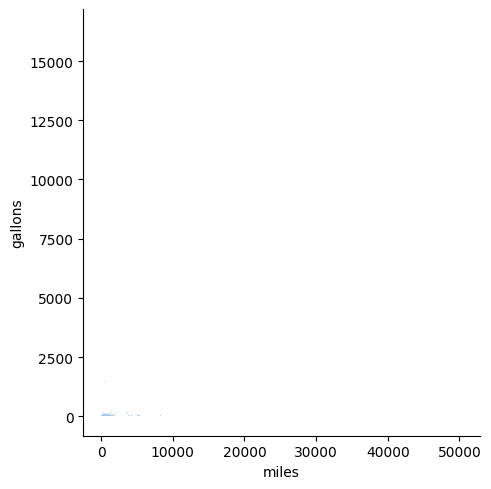

In [55]:
sns.displot(df, x="miles", y ='gallons')